## Florida COVID-19 Case Line Data Analysis
**Last Updated Decemeber 1, 2020**

**Import Python Libraries**

In [1]:
from datetime import date,datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

**Read CSV File**

In [2]:
#Source: Florida COVID19 Case Line Data- https://open-fdoh.hub.arcgis.com/datasets/florida-covid19-case-line-data
df= pd.read_csv("C:/Users/Amy/projects_python/covid_19/Florida_COVID19_Case_Line_Data113020.csv")

**Summary of the DataFrame**

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999325 entries, 0 to 999324
Data columns (total 16 columns):
County            999319 non-null object
Age               998222 non-null float64
Age_group         999319 non-null object
Gender            999319 non-null object
Jurisdiction      999319 non-null object
Travel_related    999319 non-null object
Origin            22565 non-null object
EDvisit           959468 non-null object
Hospitalized      989748 non-null object
Died              18834 non-null object
Case_             999319 non-null object
Contact           804260 non-null object
Case1             999319 non-null object
EventDate         999319 non-null object
ChartDate         999319 non-null object
ObjectId          999319 non-null float64
dtypes: float64(2), object(14)
memory usage: 122.0+ MB


**General Descriptive Statistics**

In [4]:
df.describe()

,Age,ObjectId
count,998222.000000,999319.000000
mean,41.899373,499660.000000
std,20.305136,288478.691166
min,0.000000,1.000000
25%,26.000000,249830.500000
50%,40.000000,499660.000000
75%,56.000000,749489.500000
max,110.000000,999319.000000


**View the DataFrame**

In [5]:
df

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Collier,26.0,25-34 years,Female,FL resident,No,NaN,UNKNOWN,NO,NaN,Yes,Yes,2020/05/25 05:00:00+00,2020/05/07 00:00:00+00,2020/05/25 05:00:00+00,1.0
1,Palm Beach,32.0,25-34 years,Female,FL resident,No,NaN,YES,NO,NaN,Yes,Yes,2020/05/25 05:00:00+00,2020/05/15 00:00:00+00,2020/05/25 05:00:00+00,2.0
2,Broward,33.0,25-34 years,Male,FL resident,No,NaN,NO,NO,NaN,Yes,Yes,2020/05/25 05:00:00+00,2020/05/12 00:00:00+00,2020/05/25 05:00:00+00,3.0
3,Broward,19.0,15-24 years,Female,FL resident,No,NaN,YES,NO,NaN,Yes,Yes,2020/05/25 05:00:00+00,2020/05/20 00:00:00+00,2020/05/25 05:00:00+00,4.0
4,Dade,57.0,55-64 years,Male,FL resident,No,NaN,YES,YES,NaN,Yes,NO,2020/05/25 05:00:00+00,2020/05/24 00:00:00+00,2020/05/25 05:00:00+00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999320,Duval,65.0,65-74 years,Male,FL resident,No,NaN,YES,YES,NaN,Yes,Yes,2020/07/23 05:00:00+00,2020/07/16 00:00:00+00,2020/07/23 05:00:00+00,999315.0
999321,Broward,10.0,5-14 years,Male,FL resident,No,NaN,UNKNOWN,UNKNOWN,NaN,Yes,UNKNOWN,2020/07/23 05:00:00+00,2020/07/23 03:34:25+00,2020/07/23 05:00:00+00,999316.0
999322,Orange,65.0,65-74 years,Male,FL resident,No,NaN,UNKNOWN,UNKNOWN,NaN,Yes,UNKNOWN,2020/06/12 05:00:00+00,2020/06/12 00:00:00+00,2020/06/12 05:00:00+00,999317.0
999323,Alachua,21.0,15-24 years,Female,FL resident,No,NaN,NO,NO,NaN,Yes,Yes,2020/06/12 05:00:00+00,2020/06/08 00:00:00+00,2020/06/12 05:00:00+00,999318.0


**Clean and Transform Data**

In [6]:
#Set the variable ObjectId as the index
df.set_index('ObjectId', inplace=True, drop=False)

In [7]:
#Check for null values
df[df.ObjectId.isnull()]

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
ObjectId,,,,,,,,,,,,,,,,
NaN,Manatee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Orange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Leon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Polk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Broward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Convert variables to datatime format
df['Case1']= df['Case1'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d') if not pd.isnull(x) else '')
df['EventDate']= df['EventDate'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d') if not pd.isnull(x) else '')
df['ChartDate']= df['ChartDate'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d') if not pd.isnull(x) else '')

df[['Case1', 'EventDate', 'ChartDate']]= df[['Case1', 'EventDate', 'ChartDate']].apply(pd.to_datetime)

#Convert the first character to uppercase and remaining to lowercase
df['EDvisit']= df['EDvisit'].str.capitalize()
df['Hospitalized'] = df['Hospitalized'].str.capitalize()
df['Died']= df['Died'].str.capitalize()
df['Case_']= df['Case_'].str.capitalize()
df['Contact']= df['Contact'].str.capitalize()

#Replace all NaN elements with 'Unknown'
df.fillna({'ObjectId':'Unknown', 'County':'Unknown', 'Age_group':'Unknown', 'Gender':'Unknown',
           'Travel_related':'Unknown', 'Origin':'Unknown','EDvisit':'Unknown', 'Hospitalized':'Unknown',
           'Died':'Unknown', 'Contact':'Unknown'}, inplace=True)
    

In [9]:
#Confirm that rows with null ObjectId were modified
df[df.ObjectId.isnull()]

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
ObjectId,,,,,,,,,,,,,,,,


**Summary of the Updated DataFrame**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 999325 entries, 1.0 to 999319.0
Data columns (total 16 columns):
County            999325 non-null object
Age               998222 non-null float64
Age_group         999325 non-null object
Gender            999325 non-null object
Jurisdiction      999319 non-null object
Travel_related    999325 non-null object
Origin            999325 non-null object
EDvisit           999325 non-null object
Hospitalized      999325 non-null object
Died              999325 non-null object
Case_             999319 non-null object
Contact           999325 non-null object
Case1             999319 non-null datetime64[ns]
EventDate         999319 non-null datetime64[ns]
ChartDate         999319 non-null datetime64[ns]
ObjectId          999325 non-null object
dtypes: datetime64[ns](3), float64(1), object(12)
memory usage: 169.6+ MB


**View Updated DataFrame**

In [11]:
df.head(15)

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
ObjectId,,,,,,,,,,,,,,,,
1.0,Collier,26.0,25-34 years,Female,FL resident,No,Unknown,Unknown,No,Unknown,Yes,Yes,2020-05-25,2020-05-07,2020-05-25,1
2.0,Palm Beach,32.0,25-34 years,Female,FL resident,No,Unknown,Yes,No,Unknown,Yes,Yes,2020-05-25,2020-05-15,2020-05-25,2
3.0,Broward,33.0,25-34 years,Male,FL resident,No,Unknown,No,No,Unknown,Yes,Yes,2020-05-25,2020-05-12,2020-05-25,3
4.0,Broward,19.0,15-24 years,Female,FL resident,No,Unknown,Yes,No,Unknown,Yes,Yes,2020-05-25,2020-05-20,2020-05-25,4
5.0,Dade,57.0,55-64 years,Male,FL resident,No,Unknown,Yes,Yes,Unknown,Yes,No,2020-05-25,2020-05-24,2020-05-25,5
6.0,Dade,48.0,45-54 years,Female,FL resident,No,Unknown,No,No,Unknown,Yes,No,2020-08-14,2020-08-14,2020-08-14,6
7.0,Brevard,65.0,65-74 years,Female,FL resident,No,Unknown,Unknown,Unknown,Unknown,Yes,Yes,2020-10-05,2020-09-30,2020-10-05,7
8.0,Broward,24.0,15-24 years,Female,FL resident,No,Unknown,Yes,No,Unknown,Yes,Yes,2020-07-03,2020-06-26,2020-07-03,8
9.0,Broward,35.0,35-44 years,Female,FL resident,No,Unknown,Yes,No,Unknown,Yes,No,2020-07-03,2020-07-02,2020-07-03,9


**Data Visualization**

2020-03-02        2
2020-03-03        2
2020-03-04        4
2020-03-05        1
2020-03-07        4
              ...  
2020-11-25    10470
2020-11-26     6851
2020-11-27     6348
2020-11-28     7417
2020-11-29     6717
Name: Case1, Length: 272, dtype: int64


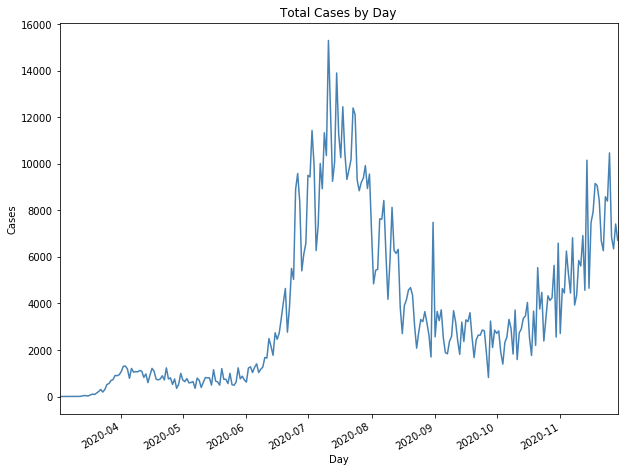

In [12]:
#Total Cases by Day
def cases_by_day():
    count_cases = df['Case1'].value_counts(sort=True)
    count_cases.sort_index(inplace=True)
    print(count_cases)

    count_cases.plot(kind='line', figsize=(10,8), legend=None, color='steelblue')
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Total Cases by Day')
    plt.show()

cases_by_day()


March          6829
April         27634
May           22099
June         102163
July         318781
August       150847
September     79706
October      100821
November     190439
Name: Case1, dtype: int64


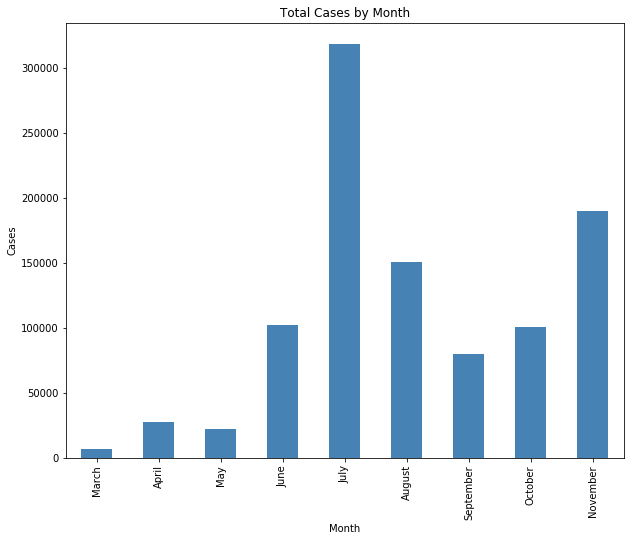

In [13]:
#Total Cases by Month
def cases_by_month():
    count_months = df['Case1'].dt.month.value_counts(ascending=True)
    count_months.sort_index(inplace=True)
    count_months.rename({1:"January", 2: "February", 3:"March", 4:"April", 5:"May", 6:"June",
                         7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}, inplace=True)
    print(count_months)
    
    count_months.plot(kind ='bar', figsize=(10,8), legend=None, color='steelblue')
    plt.xlabel('Month')
    plt.ylabel('Cases')
    plt.title('Total Cases by Month')
    plt.show()
    
cases_by_month()

2020-03-02      2
2020-03-03      2
2020-03-04      4
2020-03-05      1
2020-03-07      4
2020-03-08      1
2020-03-09      5
2020-03-10      3
2020-03-11      6
2020-03-12      7
2020-03-13     24
2020-03-14     45
2020-03-15     33
2020-03-16     31
2020-03-17     70
2020-03-18    107
2020-03-19     87
2020-03-20    150
2020-03-21    217
2020-03-22    306
2020-03-23    193
2020-03-24    299
2020-03-25    515
2020-03-26    560
2020-03-27    689
2020-03-28    727
2020-03-29    908
2020-03-30    896
2020-03-31    937
Name: Case1, dtype: int64


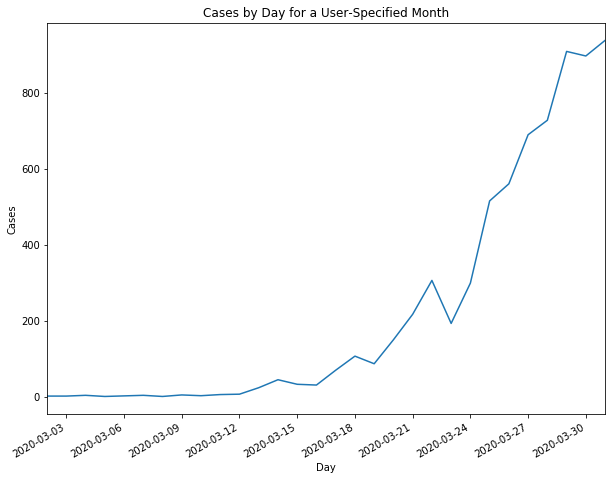

In [14]:
#This function returns the # of cases per day during a user-specified month.
#where March = 3, April = 4, May = 5, June = 6, July = 7, August = 8, September = 9, October = 10, Novemember = 11, December = 12
def cases_by_day_per_month(month):
    s = df['Case1']
    count_days = s.where(s.dt.month==month).value_counts(ascending=True)
    count_days.sort_index(inplace=True)
    print(count_days)
    
    count_days.plot(kind ='line',figsize=(10,8), legend=None)
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Cases by Day for a User-Specified Month')
    plt.show()

cases_by_day_per_month(3)


2020-10-01    2716
2020-10-02    2820
2020-10-03    1904
2020-10-04    1393
2020-10-05    2325
2020-10-06    2561
2020-10-07    3316
2020-10-08    2931
2020-10-09    1827
2020-10-10    3719
2020-10-11    1590
2020-10-12    2740
2020-10-13    2901
2020-10-14    3364
2020-10-15    3461
2020-10-16    4046
2020-10-17    2525
2020-10-18    1765
2020-10-19    3672
2020-10-20    2200
2020-10-21    5541
2020-10-22    3761
2020-10-23    4476
2020-10-24    2388
2020-10-25    3384
2020-10-26    4330
2020-10-27    4131
2020-10-28    4247
2020-10-29    5638
2020-10-30    2556
2020-10-31    6593
Name: Case1, dtype: int64


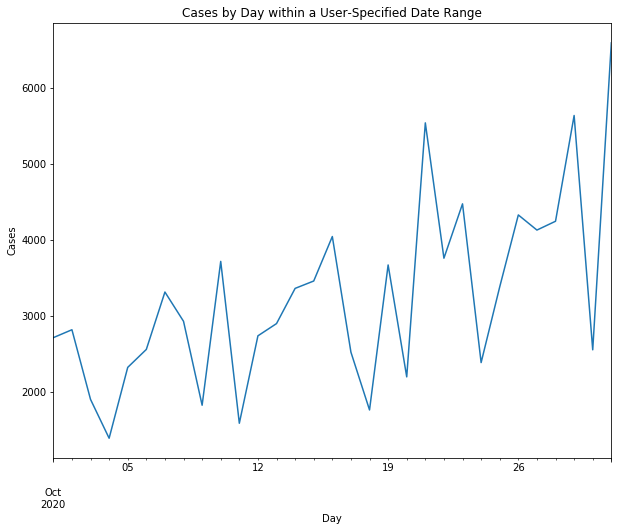

In [15]:
#This function returns the # of cases per day within a user-specified date range.
#date format ("YYYY-MM-DD", "YYYY-MM-DD")
def cases_within_date_range(start, end):
    s = df['Case1']
    count_days = s.where(s.between(start,end,inclusive=True)).value_counts(ascending=True)
    count_days.sort_index(inplace=True)
    print(count_days)
    
    count_days.plot(kind ='line',figsize=(10,8), legend=None)
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Cases by Day within a User-Specified Date Range')
    plt.show()
    
cases_within_date_range("2020-10-01", "2020-10-31")


Osceola          18354
Polk             27611
Lee              30113
Pinellas         33058
Duval            43978
Hillsborough     58293
Orange           58325
Palm Beach       65372
Broward         107524
Dade            229618
Name: County, dtype: int64


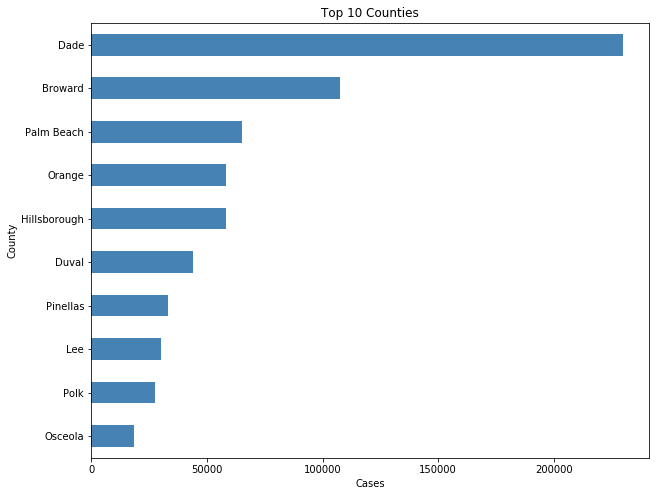

In [16]:
#Top 10 counties: Most cases
def top_10():
    count_county= df['County'].value_counts(ascending=True)
    count_top10_county = count_county.tail(10)
    print(count_top10_county)
        
    count_top10_county.plot(kind='barh', figsize=(10,8), legend=None, color='steelblue')
    plt.xlabel('Cases')
    plt.ylabel('County')
    plt.title('Top 10 Counties')
    plt.show()

top_10()

Liberty       595
Glades        672
Gilchrist     763
Jefferson     774
Franklin      830
Calhoun       870
Dixie         963
Hamilton      978
Gulf         1061
Holmes       1166
Name: County, dtype: int64


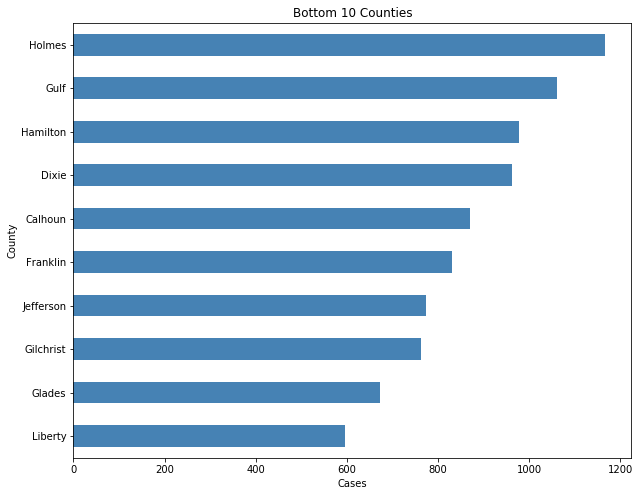

In [17]:
#Bottom 10 counties: Fewest cases
def bottom_10():
    count_county= df['County'].value_counts(ascending=True)
    count_bottom10_county = count_county.head(10)
    print(count_bottom10_county)

    count_bottom10_county.plot(kind ='barh', figsize=(10,8), legend=None, color='steelblue')
    plt.xlabel('Cases')
    plt.ylabel('County')
    plt.title('Bottom 10 Counties')
    plt.show()

bottom_10()

Liberty            595
Glades             672
Gilchrist          763
Jefferson          774
Franklin           830
                 ...  
Hillsborough     58293
Orange           58325
Palm Beach       65372
Broward         107524
Dade            229618
Name: County, Length: 68, dtype: int64


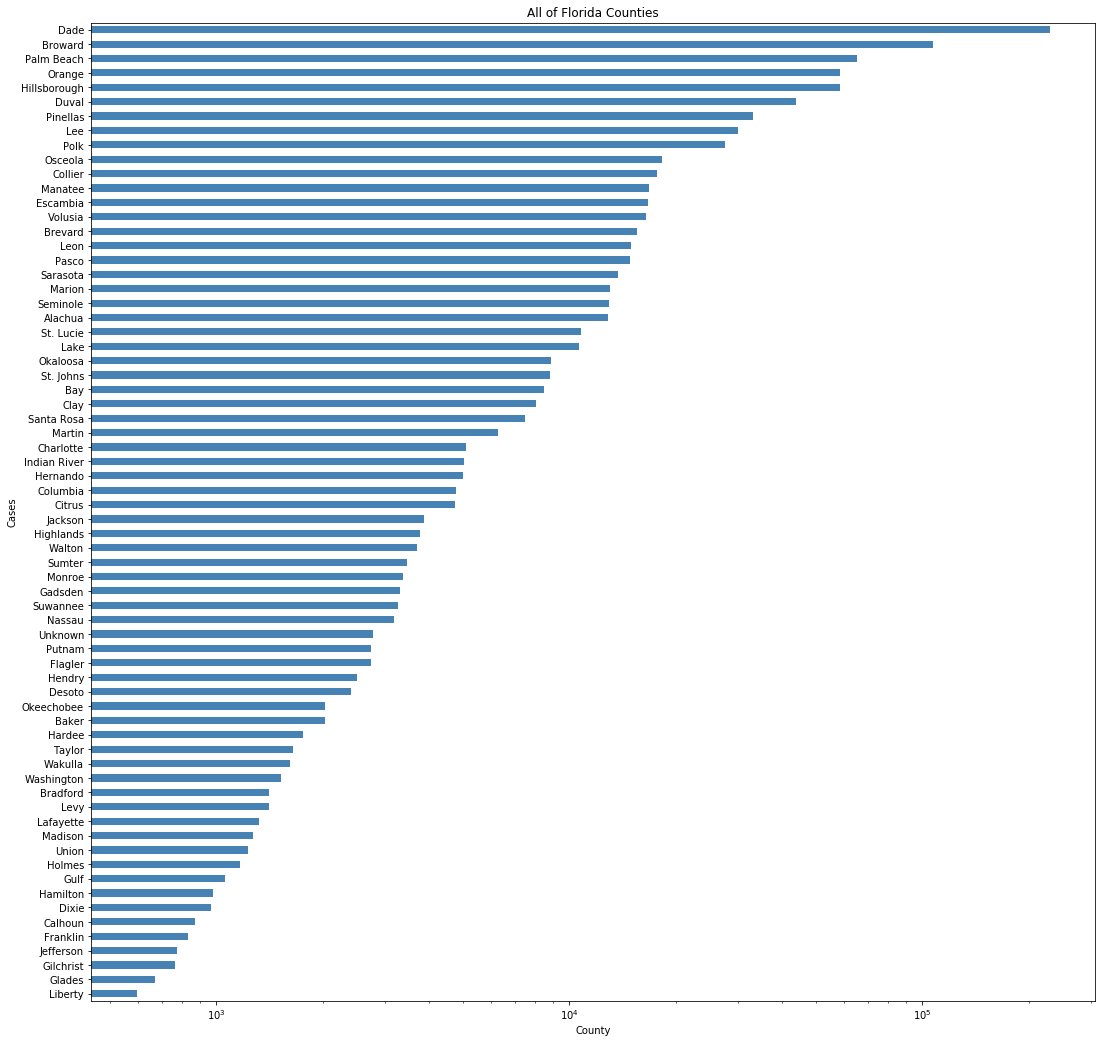

In [18]:
count_county= df['County'].value_counts(ascending=True)
count_all_county = count_county
print(count_all_county)

count_all_county.plot(kind ='barh', figsize=(18,18), legend=None, color='steelblue')
plt.xscale("log")
plt.xlabel('County')
plt.ylabel('Cases')
plt.title('All of Florida Counties')
plt.show()

Female     514072
Male       479386
Unknown      5867
Name: Gender, dtype: int64


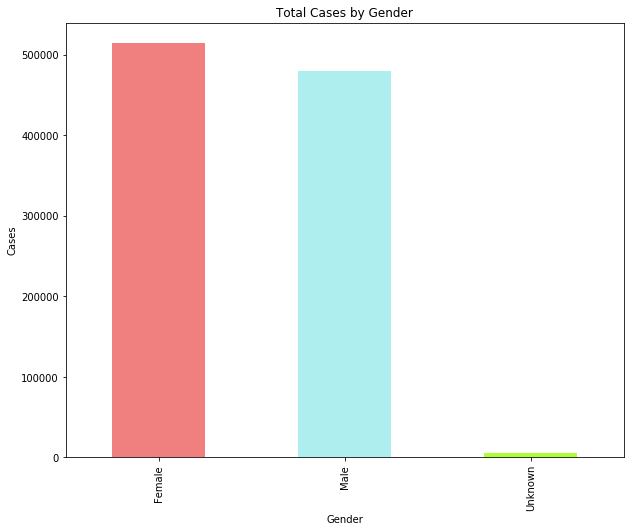

In [19]:
#Total Cases by Gender
colors = ['lightcoral', 'paleturquoise', 'greenyellow']
def gender():
    count_gender= df['Gender'].value_counts(sort=False, ascending=False)
    count_gender.sort_index(inplace=True)
    print(count_gender)
    
    count_gender.plot(kind='bar', figsize=(10,8), legend=None, color=colors)
    plt.xlabel('Gender')
    plt.ylabel('Cases')
    plt.title('Total Cases by Gender')
    plt.show()

gender()

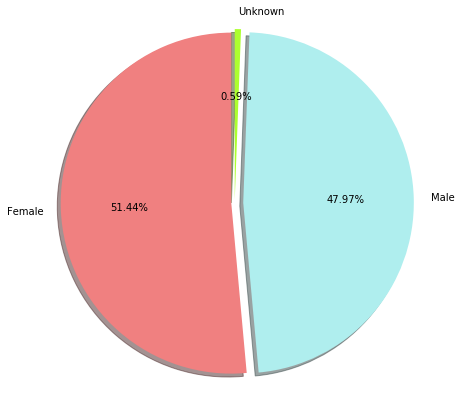

In [20]:
labels = ["Female", "Male", "Unknown"]
colors = ['lightcoral', 'paleturquoise', 'greenyellow']

count_gender= df['Gender'].value_counts(sort=False, ascending=False)
count_gender.sort_index(inplace=True)
plt.figure(figsize=(7,7))
plt.pie(count_gender, labels=labels, colors=colors, startangle=90, shadow=True, 
        explode=(0.02, 0.05, 0.02), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

0-4 years       16924
5-14 years      47340
15-24 years    162340
25-34 years    182273
35-44 years    156989
45-54 years    154193
55-64 years    129990
65-74 years     79518
75-84 years     44917
85+ years       23738
Name: Age_range, dtype: int64


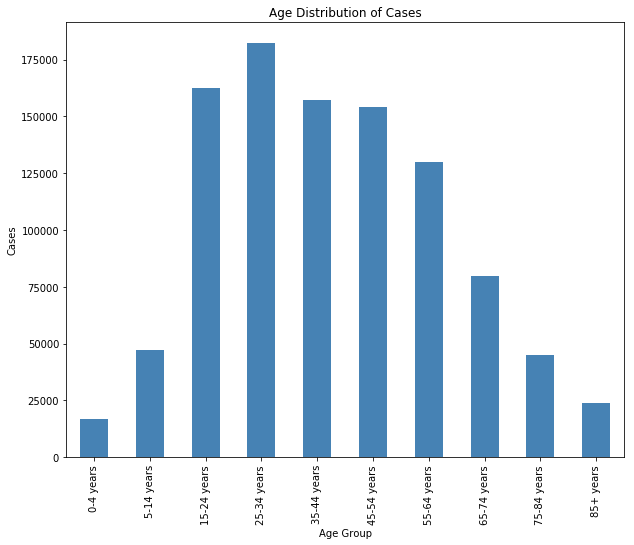

In [21]:
#Age Distribution of Cases
def age_group_count():   
    cut_bins= [0, 4, 14, 24, 34, 44, 54, 64, 74, 84, 110] 
    cut_labels=['0-4 years', '5-14 years', '15-24 years', '25-34 years', '35-44 years',
            '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85+ years']
    df['Age_range'] = pd.cut(df['Age'], bins=cut_bins, right=True, labels=cut_labels, include_lowest=True)
    count_age_group = df['Age_range'].value_counts(sort=True)
    count_age_group.sort_index(inplace=True)
    print(count_age_group)
 
    count_age_group.plot(kind='bar', figsize=(10,8), legend=None, color='steelblue')
    plt.xlabel('Age Group')
    plt.ylabel('Cases')
    plt.title('Age Distribution of Cases')
    plt.show()

age_group_count()


In [22]:
#Hospitalizations_versus_deaths
df.groupby(['Hospitalized', 'Died']).size().unstack()

Died,Unknown,Yes
Hospitalized,,
No,521832,2771
Unknown,414856,4312
Yes,43803,11751


2020-03-02      1
2020-03-04      1
2020-03-05      1
2020-03-07      3
2020-03-09      1
2020-03-10      1
2020-03-12      2
2020-03-13     15
2020-03-14     22
2020-03-15     10
2020-03-16     15
2020-03-17     16
2020-03-18     35
2020-03-19     20
2020-03-20     46
2020-03-21     63
2020-03-22     67
2020-03-23     63
2020-03-24     78
2020-03-25    134
2020-03-26    118
2020-03-27    181
2020-03-28    158
2020-03-29    214
2020-03-30    237
2020-03-31    215
Name: Case1, dtype: int64


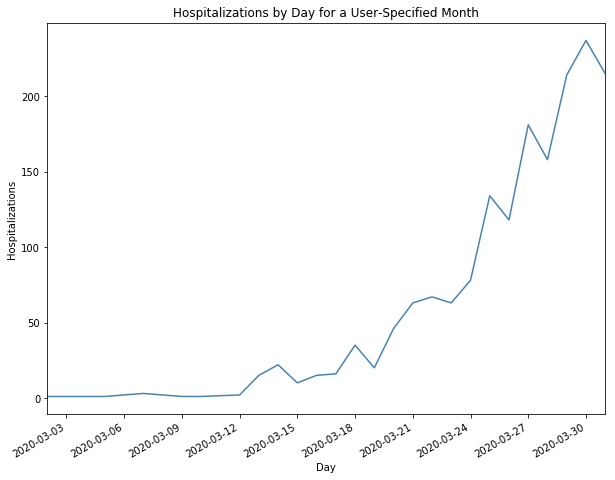

In [23]:
#This function returns the # of hospitalizations per day during a user-specified month.
def hospitalizations_by_day(month):
    hospitalized = df["Hospitalized"] == "Yes"
    df_hospitalized = df[hospitalized]
    count_hospitalized = df_hospitalized["Case1"]
    count_hospitalizations_by_day = count_hospitalized.where(count_hospitalized.dt.month==month).value_counts(ascending=True)
    count_hospitalizations_by_day.sort_index(inplace=True)
    print(count_hospitalizations_by_day)
    
    count_hospitalizations_by_day.plot(kind='line', figsize=(10,8), legend=None, color='steelblue')
    plt.xlabel('Day')
    plt.ylabel('Hospitalizations')
    plt.title('Hospitalizations by Day for a User-Specified Month')

hospitalizations_by_day(3)


Yes         55554
Unknown    419168
No         524603
Name: Hospitalized, dtype: int64


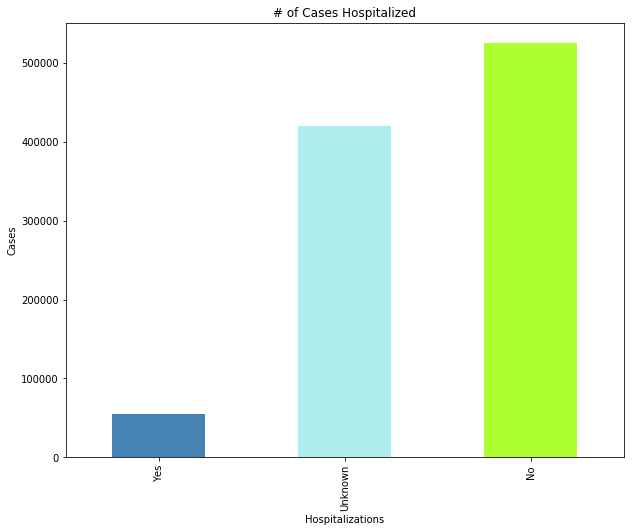

In [24]:
#Total Cases Hospitalized
colors = ['steelblue','paleturquoise','greenyellow']

def hospitalizations():
    count_hospitalization = df['Hospitalized'].value_counts(ascending = True)
    print(count_hospitalization)
    
    count_hospitalization.plot(kind='bar', figsize=(10,8), legend=None, color=colors)
    plt.xlabel('Hospitalizations')
    plt.ylabel('Cases')
    plt.title('# of Cases Hospitalized')
    plt.show()
    
hospitalizations()

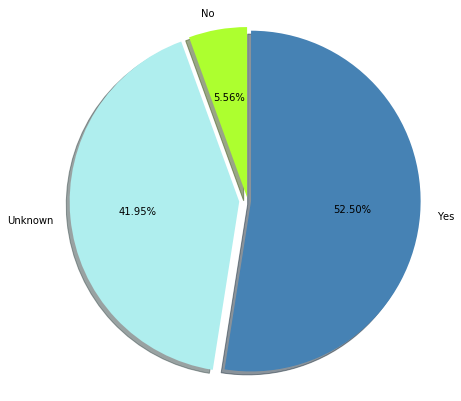

In [25]:
labels = ["No", "Unknown", "Yes"]
colors = ['greenyellow', 'paleturquoise', 'steelblue']

count_hospitalization = df['Hospitalized'].value_counts(ascending = True)
plt.figure(figsize=(7,7))
plt.pie(count_hospitalization, labels=labels, colors=colors, startangle=90, shadow=True, 
        explode=(0.02, 0.05, 0.02), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

Hospitalized      No  Unknown    Yes
Case1                               
2020-03-02       1.0      0.0    1.0
2020-03-03       1.0      1.0    0.0
2020-03-04       3.0      0.0    1.0
2020-03-05       0.0      0.0    1.0
2020-03-07       1.0      0.0    3.0
...              ...      ...    ...
2020-11-25    4166.0   6186.0  118.0
2020-11-26    2480.0   4296.0   75.0
2020-11-27    2322.0   3933.0   93.0
2020-11-28    2167.0   5193.0   57.0
2020-11-29     692.0   6007.0   18.0

[272 rows x 3 columns]


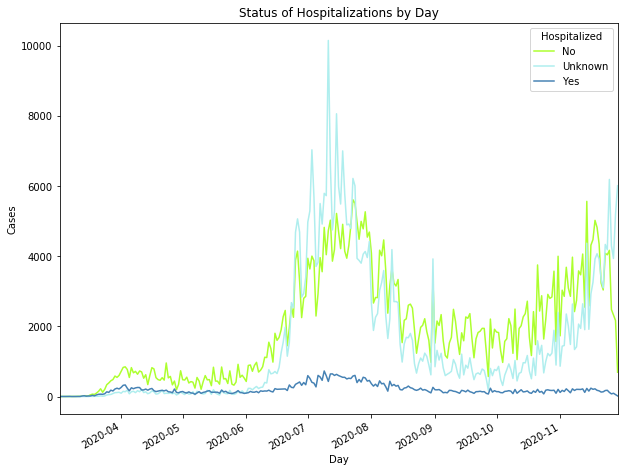

In [26]:
colors = ['greenyellow', 'paleturquoise', 'steelblue']

def status_hospitalizations():
    count_hospitilization = df.groupby('Case1')['Hospitalized'].value_counts(ascending=True).unstack().fillna(0)
    print(count_hospitilization)

    count_hospitilization.plot(kind='line', figsize=(10,8), color=colors)
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Status of Hospitalizations by Day')
    plt.show()

status_hospitalizations()

2020-09-01    71
2020-09-02    60
2020-09-03    70
2020-09-04    71
2020-09-05    43
2020-09-06    53
2020-09-07    39
2020-09-08    68
2020-09-09    61
2020-09-10    70
2020-09-11    59
2020-09-12    37
2020-09-13    32
2020-09-14    64
2020-09-15    51
2020-09-16    45
2020-09-17    78
2020-09-18    68
2020-09-19    33
2020-09-20    30
2020-09-21    50
2020-09-22    40
2020-09-23    45
2020-09-24    51
2020-09-25    41
2020-09-26    30
2020-09-27    18
2020-09-28    72
2020-09-29    42
2020-09-30    69
Name: Case1, dtype: int64


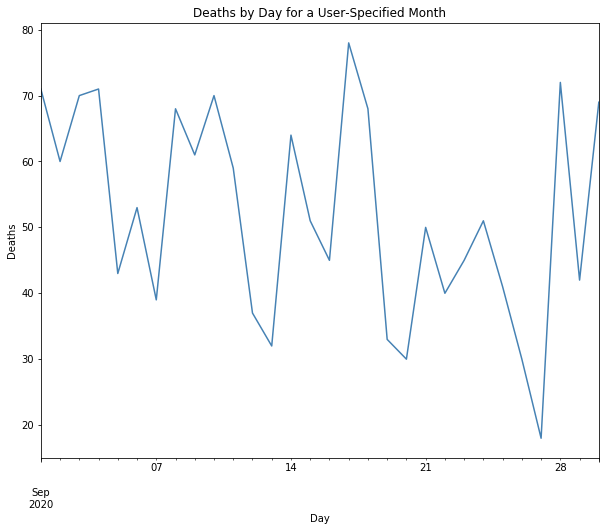

In [27]:
#This function returns the # of deaths per day during a user-specified month.
def deaths_by_day(month):
    died = df["Died"] == "Yes"
    df_died = df[died]
    count_died = df_died["Case1"]
    count_died_by_day = count_died.where(count_died.dt.month==month).value_counts(ascending=True)
    count_died_by_day.sort_index(inplace=True)
    print(count_died_by_day)
    
    count_died_by_day.plot(kind ='line', figsize=(10,8), legend=None, color='steelblue')
    plt.xlabel('Day')
    plt.ylabel('Deaths')
    plt.title('Deaths by Day for a User-Specified Month')

deaths_by_day(9)


Yes         18834
Unknown    980491
Name: Died, dtype: int64


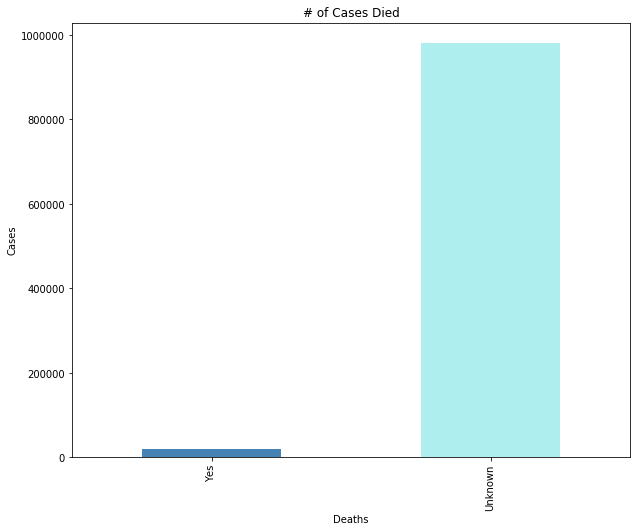

In [28]:
colors = ['steelblue','paleturquoise']

def deaths():
    count_death= df['Died'].value_counts(ascending=True)
    print(count_death)

    count_death.plot(kind='bar', figsize=(10,8), legend=None, color=colors)
    plt.xlabel('Deaths')
    plt.ylabel('Cases')
    plt.title('# of Cases Died')
    plt.show()
    
deaths()

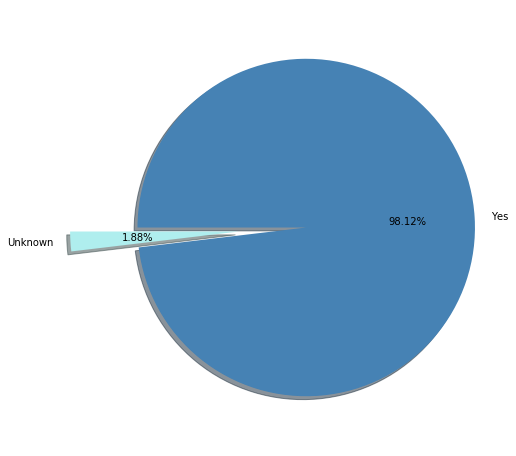

In [29]:
labels = ["Unknown", "Yes"]
colors = ['paleturquoise', 'steelblue']

count_death= df['Died'].value_counts(ascending=True)
plt.figure(figsize=(8,8))
plt.pie(count_death, labels=labels, colors=colors, startangle=180, shadow=True, 
        explode=(0.1, 0.3), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

Died        Unknown  Yes
Case1                   
2020-03-02      2.0  0.0
2020-03-03      2.0  0.0
2020-03-04      4.0  0.0
2020-03-05      0.0  1.0
2020-03-07      3.0  1.0
...             ...  ...
2020-11-25  10466.0  4.0
2020-11-26   6849.0  2.0
2020-11-27   6346.0  2.0
2020-11-28   7415.0  2.0
2020-11-29   6717.0  0.0

[272 rows x 2 columns]


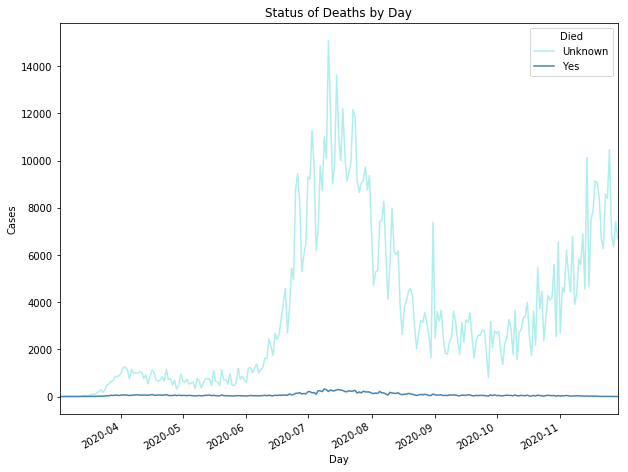

In [30]:
colors = ['paleturquoise', 'steelblue']

def status_deaths():
    count_died = df.groupby('Case1')['Died'].value_counts(ascending=True).unstack().fillna(0)
    print(count_died)
    
    count_died.plot(kind='line', figsize=(10,8), color=colors)
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Status of Deaths by Day')
    plt.show()

status_deaths()